Projeto AWS Rekognition - Detectando Celebridades em Imagens

Este Projeto foi realizado por Maurício André de Almeida como trabalho no curso DIO.ME Nexa - Análise Avançada de Imagens e Texto com IA na AWS
        

In [41]:
import boto3
import json
import matplotlib.pyplot as plt
import matplotlib.image as img

from PIL import Image, ImageDraw, ImageFont

import os
import glob

Função para listar os arquivos de imagens:

In [42]:
def listar_arquivos_jpg(diretorio):
       
    diretorio = os.path.join(diretorio, "") 
    arquivos_jpg = glob.glob(os.path.join(diretorio, "*.jpg"))
    return arquivos_jpg

Definindo o serviço e o caminho das imagens

In [43]:
client = boto3.client('rekognition', region_name='us-east-1')

filepath = './Images/Celeb/'


#Funções para processar as imagens desenhar um retângulo em cada celebridade encontrada e colocar o nome

In [44]:

def desenhar_bounding_box(imagem, bbox, nome):    
    
    imagem_dest = ImageDraw.Draw(imagem)
    fonte = ImageFont.load_default()
    width, height = imagem.size
    # Calcular a posição do retângulo

    left = int(bbox["Left"] * width) 
    top = int(bbox["Top"] * height)  
    right = int((bbox["Left"] + bbox["Width"]) * width) 
    bottom = int((bbox["Top"] + bbox["Height"]) * height) 
    #desenhar o retângulo em torno do rosto da celebridade
    imagem_dest.rectangle([left, top, right, bottom], outline="green", width=3)
    # Calcular a posição do texto
    text_pos = (left, top - 12)
    #Desenhar o retângulo para o texto
    textbox = imagem_dest.textbbox(text_pos, nome, font=fonte)
    imagem_dest.rectangle(textbox, fill="green",)
    # Escrever o nome da celebridade
    imagem_dest.text(text_pos, nome, font=fonte, fill="white")
    #gravar a imagem de destino
    return imagem
    

def processar_faces(arquivo, faces):
    imagem = Image.open(arquivo)
    print(f"Encontradas {len(response['CelebrityFaces'])} celebridades na imagem: {arquivo}")
    for face in faces:
        nome = face['Name']
        bbox = face['Face']['BoundingBox']
        confianca = face['MatchConfidence']
        if confianca < 90:
            continue
        print('Nome: ' + nome + '- Confidence: {:.2f}'.format(confianca))
        imagem = desenhar_bounding_box(imagem, bbox, nome)
    return imagem


Código Principal que percorre todos os arquivos na pasta e pesquisa as celebridades no Rekognition e exibe o resultado

Encontrados 4 arquivos JPG no diretório: ./Images/Celeb/
Processando imagem: ./Images/Celeb\g1.jpg
Encontradas 6 celebridades na imagem: ./Images/Celeb\g1.jpg
Nome: Don Cheadle- Confidence: 100.00
Nome: Matt Damon- Confidence: 100.00
Nome: Andy García- Confidence: 100.00
Nome: George Clooney- Confidence: 100.00
Nome: Brad Pitt- Confidence: 100.00
Nome: Julia Roberts- Confidence: 100.00
Imagem salva em: ./Images/Celeb\g1_dest.jpg


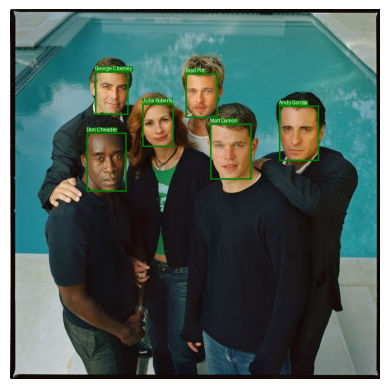

Processando imagem: ./Images/Celeb\g2.jpg
Encontradas 6 celebridades na imagem: ./Images/Celeb\g2.jpg
Nome: Matt Damon- Confidence: 100.00
Nome: Don Cheadle- Confidence: 100.00
Nome: Brad Pitt- Confidence: 100.00
Nome: Barbara Walters- Confidence: 99.99
Nome: George Clooney- Confidence: 99.99
Nome: Julia Roberts- Confidence: 100.00
Imagem salva em: ./Images/Celeb\g2_dest.jpg


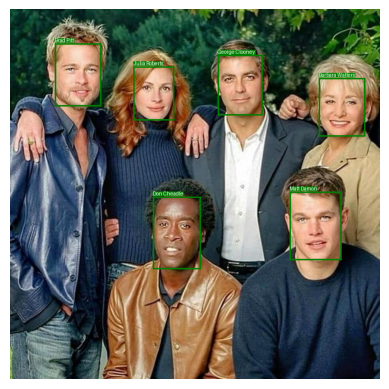

Processando imagem: ./Images/Celeb\g3.jpg
Encontradas 7 celebridades na imagem: ./Images/Celeb\g3.jpg
Nome: Bernie Mac- Confidence: 100.00
Nome: Don Cheadle- Confidence: 100.00
Nome: Brad Pitt- Confidence: 100.00
Nome: George Clooney- Confidence: 100.00
Nome: Catherine Zeta-Jones- Confidence: 100.00
Nome: Matt Damon- Confidence: 100.00
Nome: Julia Roberts- Confidence: 99.99
Imagem salva em: ./Images/Celeb\g3_dest.jpg


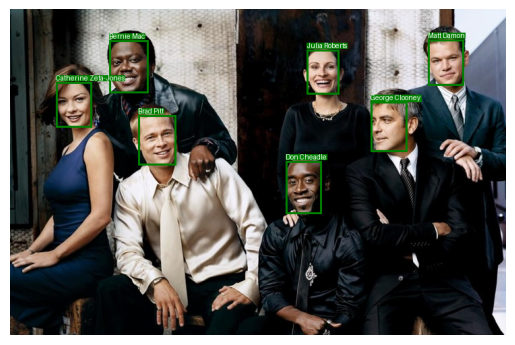

Processando imagem: ./Images/Celeb\g4.jpg
Encontradas 5 celebridades na imagem: ./Images/Celeb\g4.jpg
Nome: Tim Roth- Confidence: 99.96
Nome: Steve Buscemi- Confidence: 100.00
Nome: Harvey Keitel- Confidence: 100.00
Nome: Quentin Tarantino- Confidence: 100.00
Nome: Michael Madsen- Confidence: 99.99
Imagem salva em: ./Images/Celeb\g4_dest.jpg


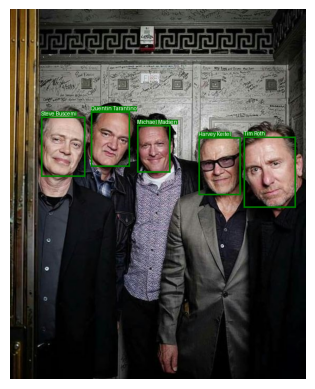

In [45]:
grupos_jpg = listar_arquivos_jpg(filepath)

print(f"Encontrados {len(grupos_jpg)} arquivos JPG no diretório: {filepath}")
for file in grupos_jpg:
    print(f"Processando imagem: {file}")
    with open(file, 'rb') as imagem_orig:
        response = client.recognize_celebrities(
            Image={'Bytes': imagem_orig.read()})
    if not response['CelebrityFaces']:
        print(f"Não foram encontradas celebridades na imagem: {arquivo}")
    else:
        faces = response['CelebrityFaces']
        img_dest = processar_faces(file, faces)
        arq_dest = file.replace('.jpg', '_dest.jpg')
        img_dest.save(arq_dest)
        print(f"Imagem salva em: {arq_dest}")
        plt.imshow(img_dest)
        plt.axis('off')
        plt.show()
    
  